In [172]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
import pandas as pd
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn import linear_model 
import warnings
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

In [105]:
# Read data from txt file, headers have spaces in them..
data = pd.read_csv('case1Data.txt', sep=",")
x_new = pd.read_csv('case1Data_Xnew.txt', sep=",")

# Explorative data analysis

## Training data

In [106]:
print("Shape", data.shape)
# convert datatypes
data = data.apply(lambda x: x.astype('float64') if 'x' in x.name else x)
data = data.apply(lambda x: x.astype('category') if 'C' in x.name else x)
data.head()

Shape (100, 101)


y       x_ 1       x_ 2      x_ 3      x_ 4       x_ 5      x_ 6  \
0  90.685036        NaN        NaN -3.978178 -1.504027 -14.986790  0.651581   
1  60.844445  26.204958  11.185962 -8.247602 -3.875866 -11.329702  2.637900   
2  18.062345  18.560873  11.355342 -9.370161 -3.745315 -16.292421 -1.831774   
3  -8.139839  31.896496  10.069040 -9.484426 -1.512786 -11.421909 -5.649180   
4  -4.994792  25.400286        NaN -3.600959 -2.615988 -15.455676 -4.950816   

        x_ 7       x_ 8      x_ 9  ...       x_91      x_92       x_93  \
0 -37.878245  16.213807 -3.965437  ...  -7.032047  6.319109        NaN   
1 -39.617497        NaN -2.442164  ... -13.437474       NaN -12.880342   
2 -37.584605  14.411348 -2.376175  ... -12.291624  2.664209 -15.803518   
3 -42.830037  18.403197 -7.791762  ... -13.253436  5.004891 -13.879328   
4 -39.932456        NaN -7.341165  ...        NaN  5.101262 -16.938532   

        x_94       x_95   C_ 1   C_ 2   C_ 3   C_ 4   C_ 5  
0  26.197445  -9.913837      H      H      I      K      J  
1  25.924603  -7.015803      K      H      J      G      G  
2  24.293073 -14.795709      I      H      G      H      G  
3  25.954304  -9.365574    NaN      H      K      K      G  
4  22.611184 -17.240003      G      H      H      K      H  

[5 rows x 101 columns]

In [58]:
data.describe()

y       x_ 1       x_ 2       x_ 3       x_ 4       x_ 5  \
count  100.000000  84.000000  87.000000  81.000000  82.000000  85.000000   
mean    -9.449225  24.152278  11.535373  -9.744737  -4.060555 -16.392856   
std     54.637475   3.226483   2.616437   3.201830   2.605455   2.820285   
min   -178.046246  16.031508   4.278967 -16.157991 -10.456794 -24.271015   
25%    -44.109740  21.718763   9.735326 -11.824124  -5.868863 -17.906581   
50%     -5.108532  24.039863  11.204954  -9.711051  -3.823393 -16.290923   
75%     24.499702  26.422000  13.360494  -7.684899  -2.458013 -14.732024   
max    113.446867  31.991717  18.573992  -1.861803   2.531620  -9.921926   

            x_ 6       x_ 7       x_ 8       x_ 9  ...       x_86       x_87  \
count  91.000000  89.000000  85.000000  87.000000  ...  84.000000  92.000000   
mean   -2.810344 -38.684160  15.323868  -4.836150  ...  17.637259   0.652821   
std     2.946260   2.235738   3.036549   2.825773  ...   2.747872   3.001337   
min   -10.201020 -43.827753   8.435083 -11.078308  ...  11.211716  -6.232716   
25%    -4.655860 -40.320246  12.998737  -6.770507  ...  15.798499  -1.607624   
50%    -2.431349 -38.787664  15.739363  -4.969147  ...  17.573367   0.636956   
75%    -0.953774 -37.246405  17.485969  -2.585693  ...  19.409453   2.920330   
max     4.792236 -31.823017  24.255647   1.294652  ...  24.234257   6.492363   

            x_88       x_89       x_90       x_91       x_92       x_93  \
count  86.000000  88.000000  83.000000  79.000000  87.000000  87.000000   
mean   12.151878  -7.467135  -8.040902 -14.477416   4.552843 -16.015159   
std     3.026242   2.808379   2.672240   3.087054   2.670058   2.759980   
min     4.481362 -13.284533 -16.702016 -21.322369  -1.395252 -21.761067   
25%    10.239859  -9.517063  -9.918741 -16.347168   2.560855 -17.887639   
50%    12.737008  -6.902784  -8.000845 -14.268092   4.749562 -16.170375   
75%    13.810049  -5.718319  -5.983640 -13.100169   6.476377 -14.151908   
max    19.442490  -0.294956  -1.973244  -6.163989  10.183673  -8.911256   

            x_94       x_95  
count  85.000000  90.000000  
mean   23.371891 -13.343786  
std     2.781380   3.125821  
min    16.877332 -19.410096  
25%    21.474290 -15.972494  
50%    23.697288 -12.975518  
75%    25.497565 -11.206957  
max    29.450024  -6.630455  

[8 rows x 96 columns]

In [107]:
features = [x for x in data.columns if x != 'y']   
numerical_features = data[features].select_dtypes(include=['float64']).columns
categorical_features = data[features].select_dtypes(include=['category']).columns

#### Missing values
* Lots of them, how to handle?
* Assume they are missing at random
* Deletion, imputation or model based?
* Deletion: Will lose too much information
* Imputation: Perhaps, but chose carefully. Look at histogram of each feature for continous. For categorical, consider just making NaN into a category in itself, or remove?
* SciKit Learns IterativeImputation seem to be working very well and catches trends in data while keeping the same overall summary statistics.

Number of contionous features with missing values = 95
Total number of missing values = 1381


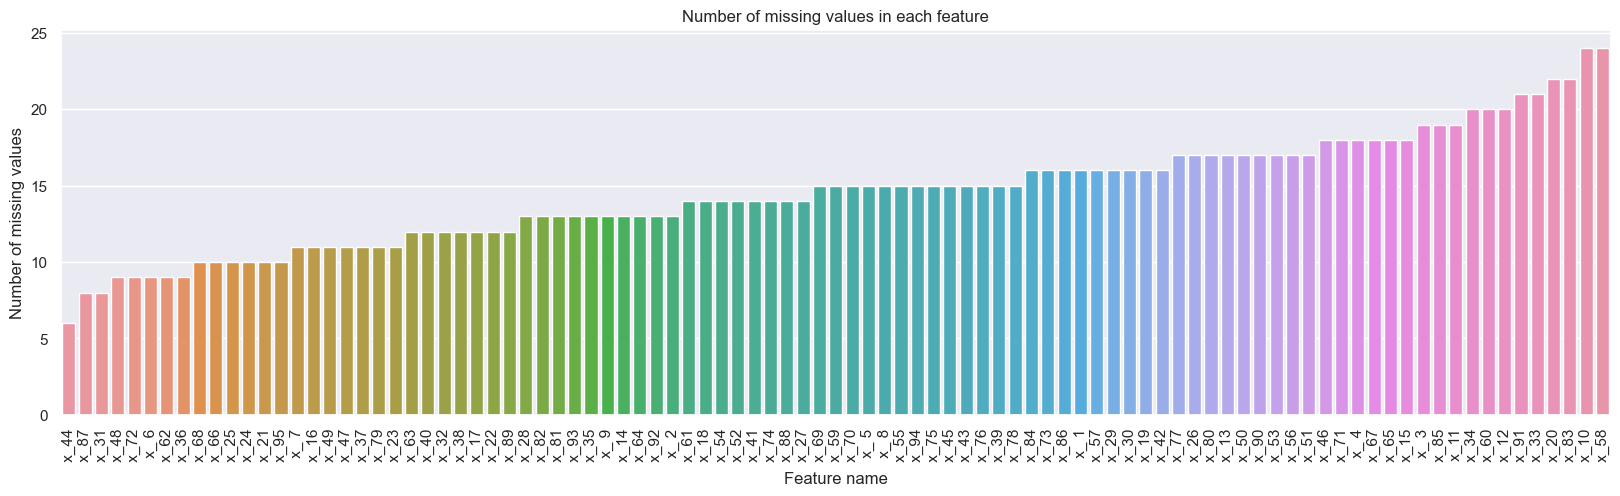

In [108]:
# Count plot of variables with missing values
missing = data.isnull().sum()
missing = missing[missing > 0]
print("Number of contionous features with missing values =", missing.shape[0])
print("Total number of missing values =", missing.sum())
missing.sort_values(inplace=True)
plt.figure(figsize=(20, 5))
plt.title("Number of missing values in each feature")
plt.xlabel("Feature name")
plt.ylabel("Number of missing values")
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=90)
plt.savefig('Plots/train_num_missing_values.png')
plt.show()

/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/sea

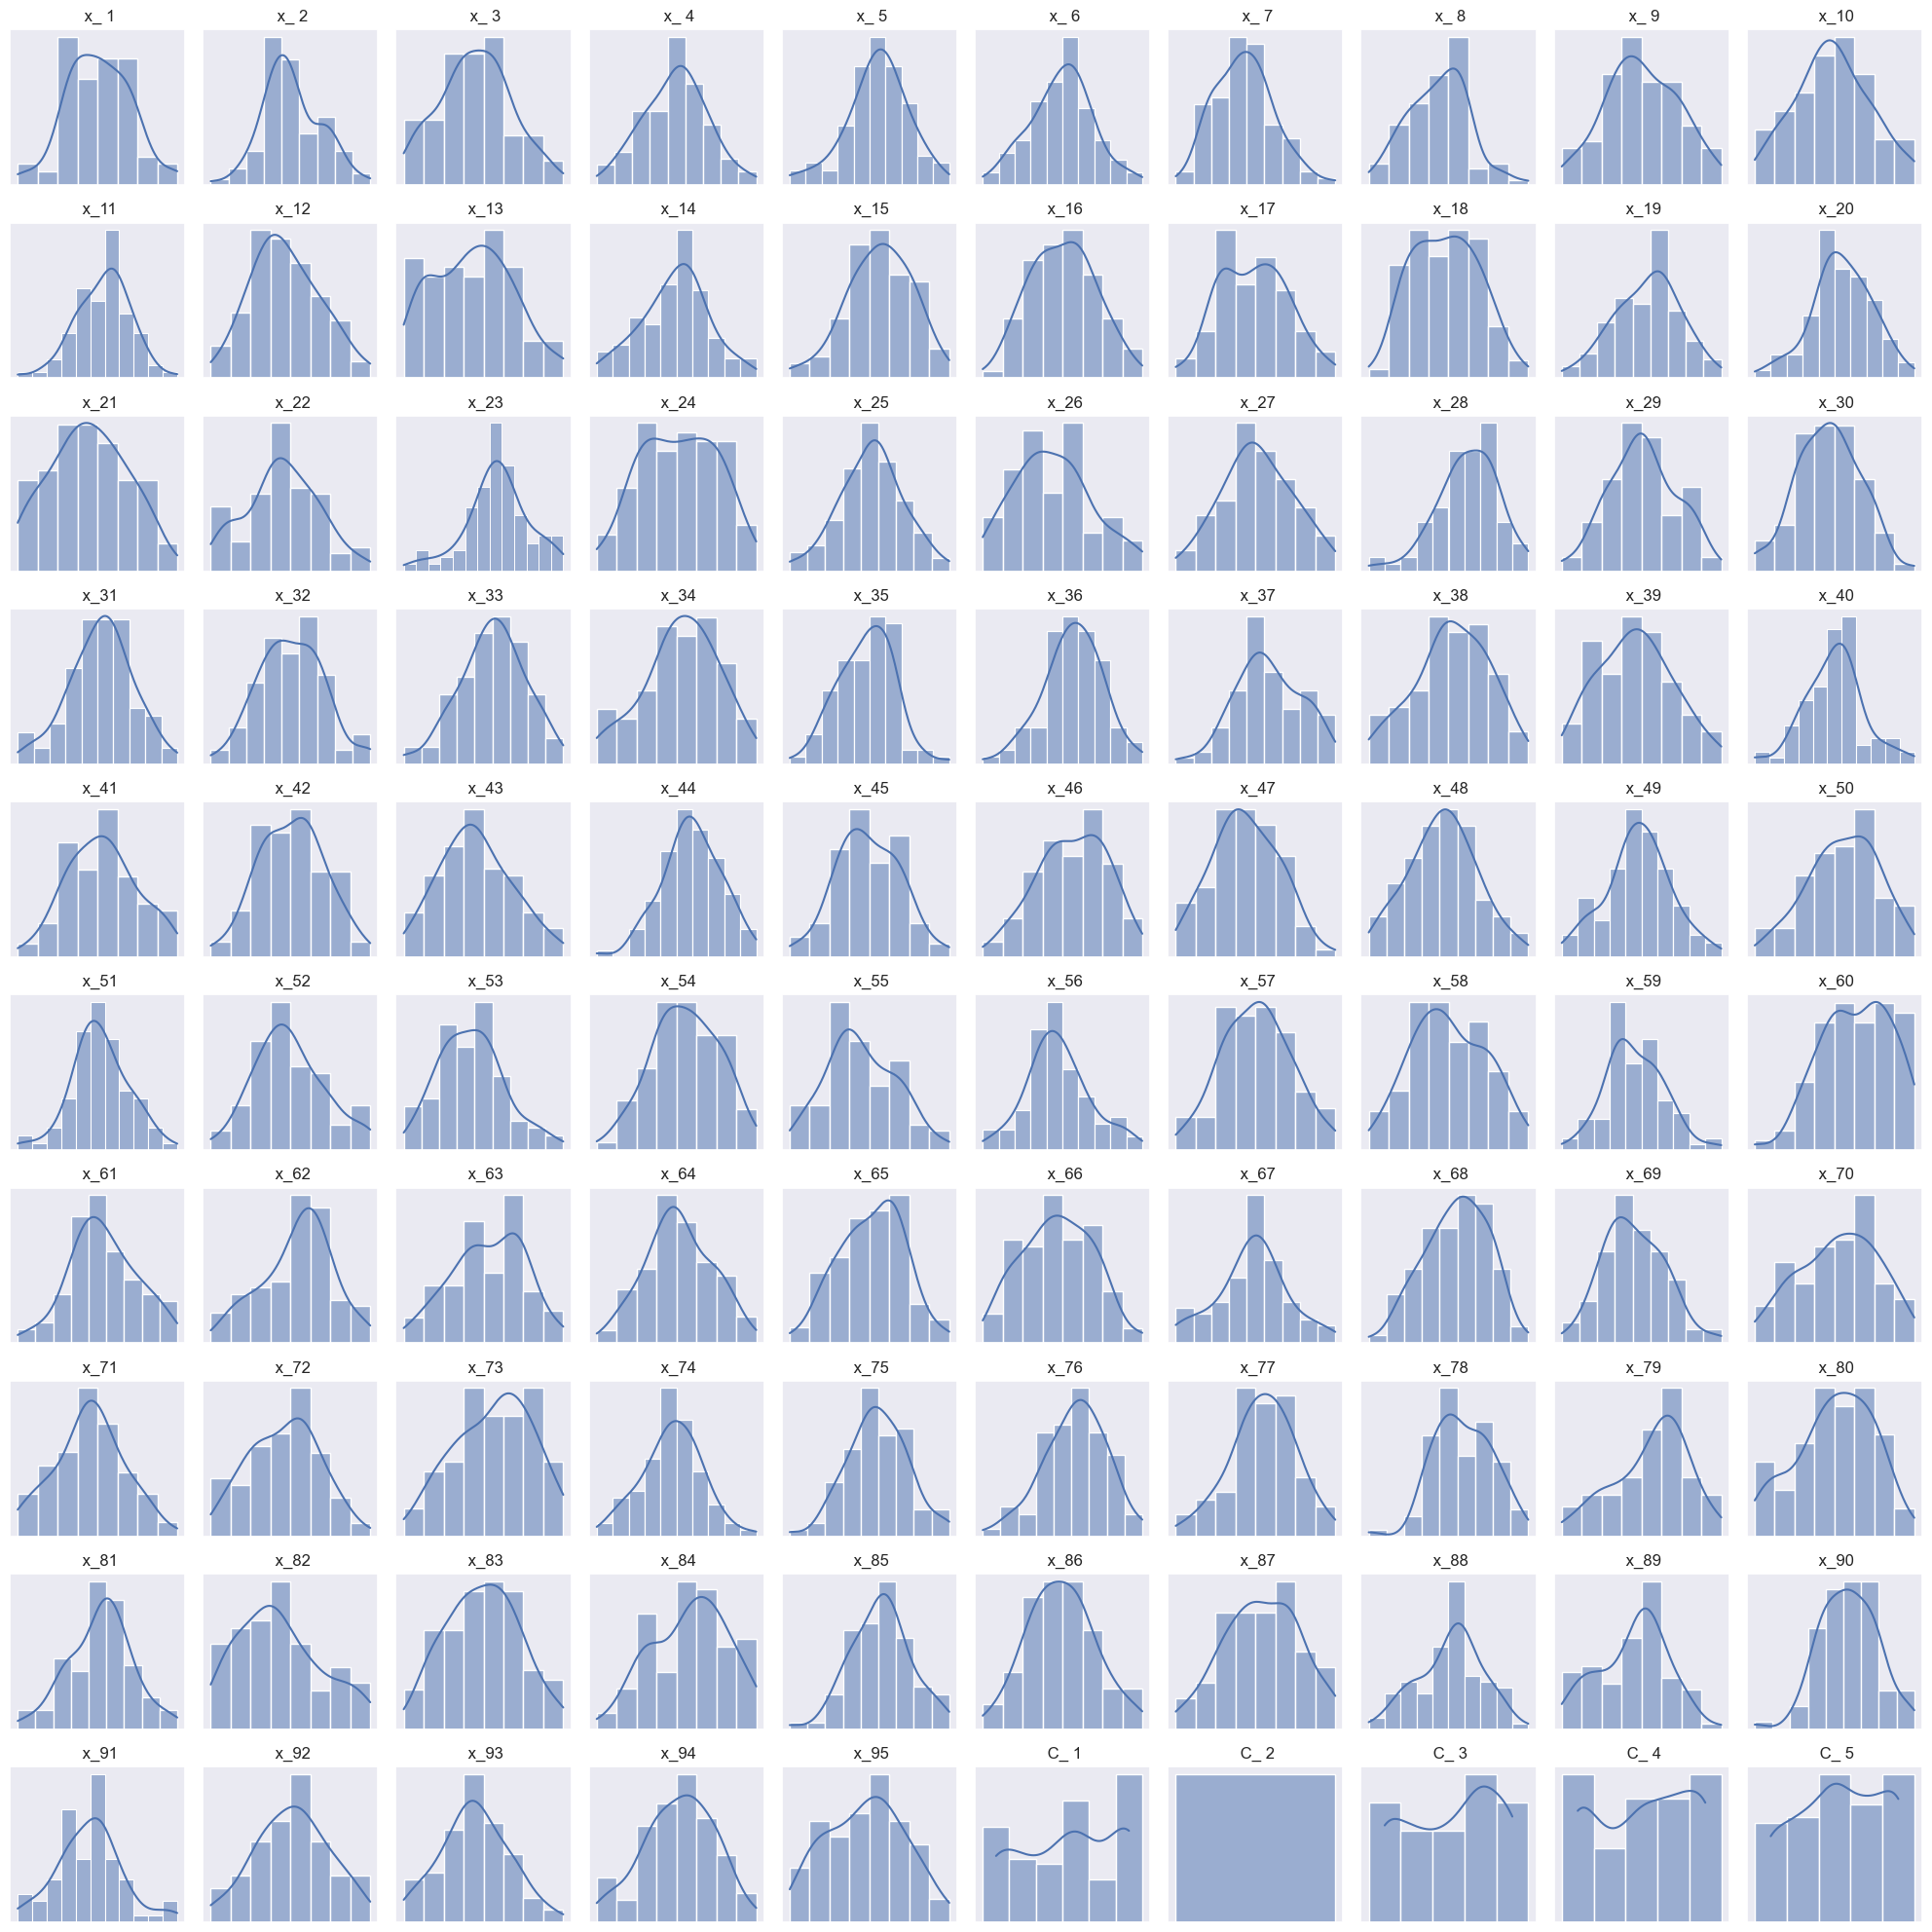

In [8]:
# histogram of each feature with missing values
plt.figure(figsize=(20, 20))
for i, feature in enumerate(features):
    plt.subplot(10, 10, i+1)
    plt.title(feature)
    sns.histplot(data[feature], kde=True)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.savefig('Plots/train_histograms.png')
plt.show()

In [9]:
# Visualize development of each numerical feature over time in one plot
plt.figure(figsize=(20, 40))
for i, feature in enumerate(features):
    plt.subplot(20, 5, i+1)
    plt.title(feature)
    plt.plot(data[feature])
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.savefig('Plots/train_development_missing_values.png')
plt.show()

KeyboardInterrupt: 

/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


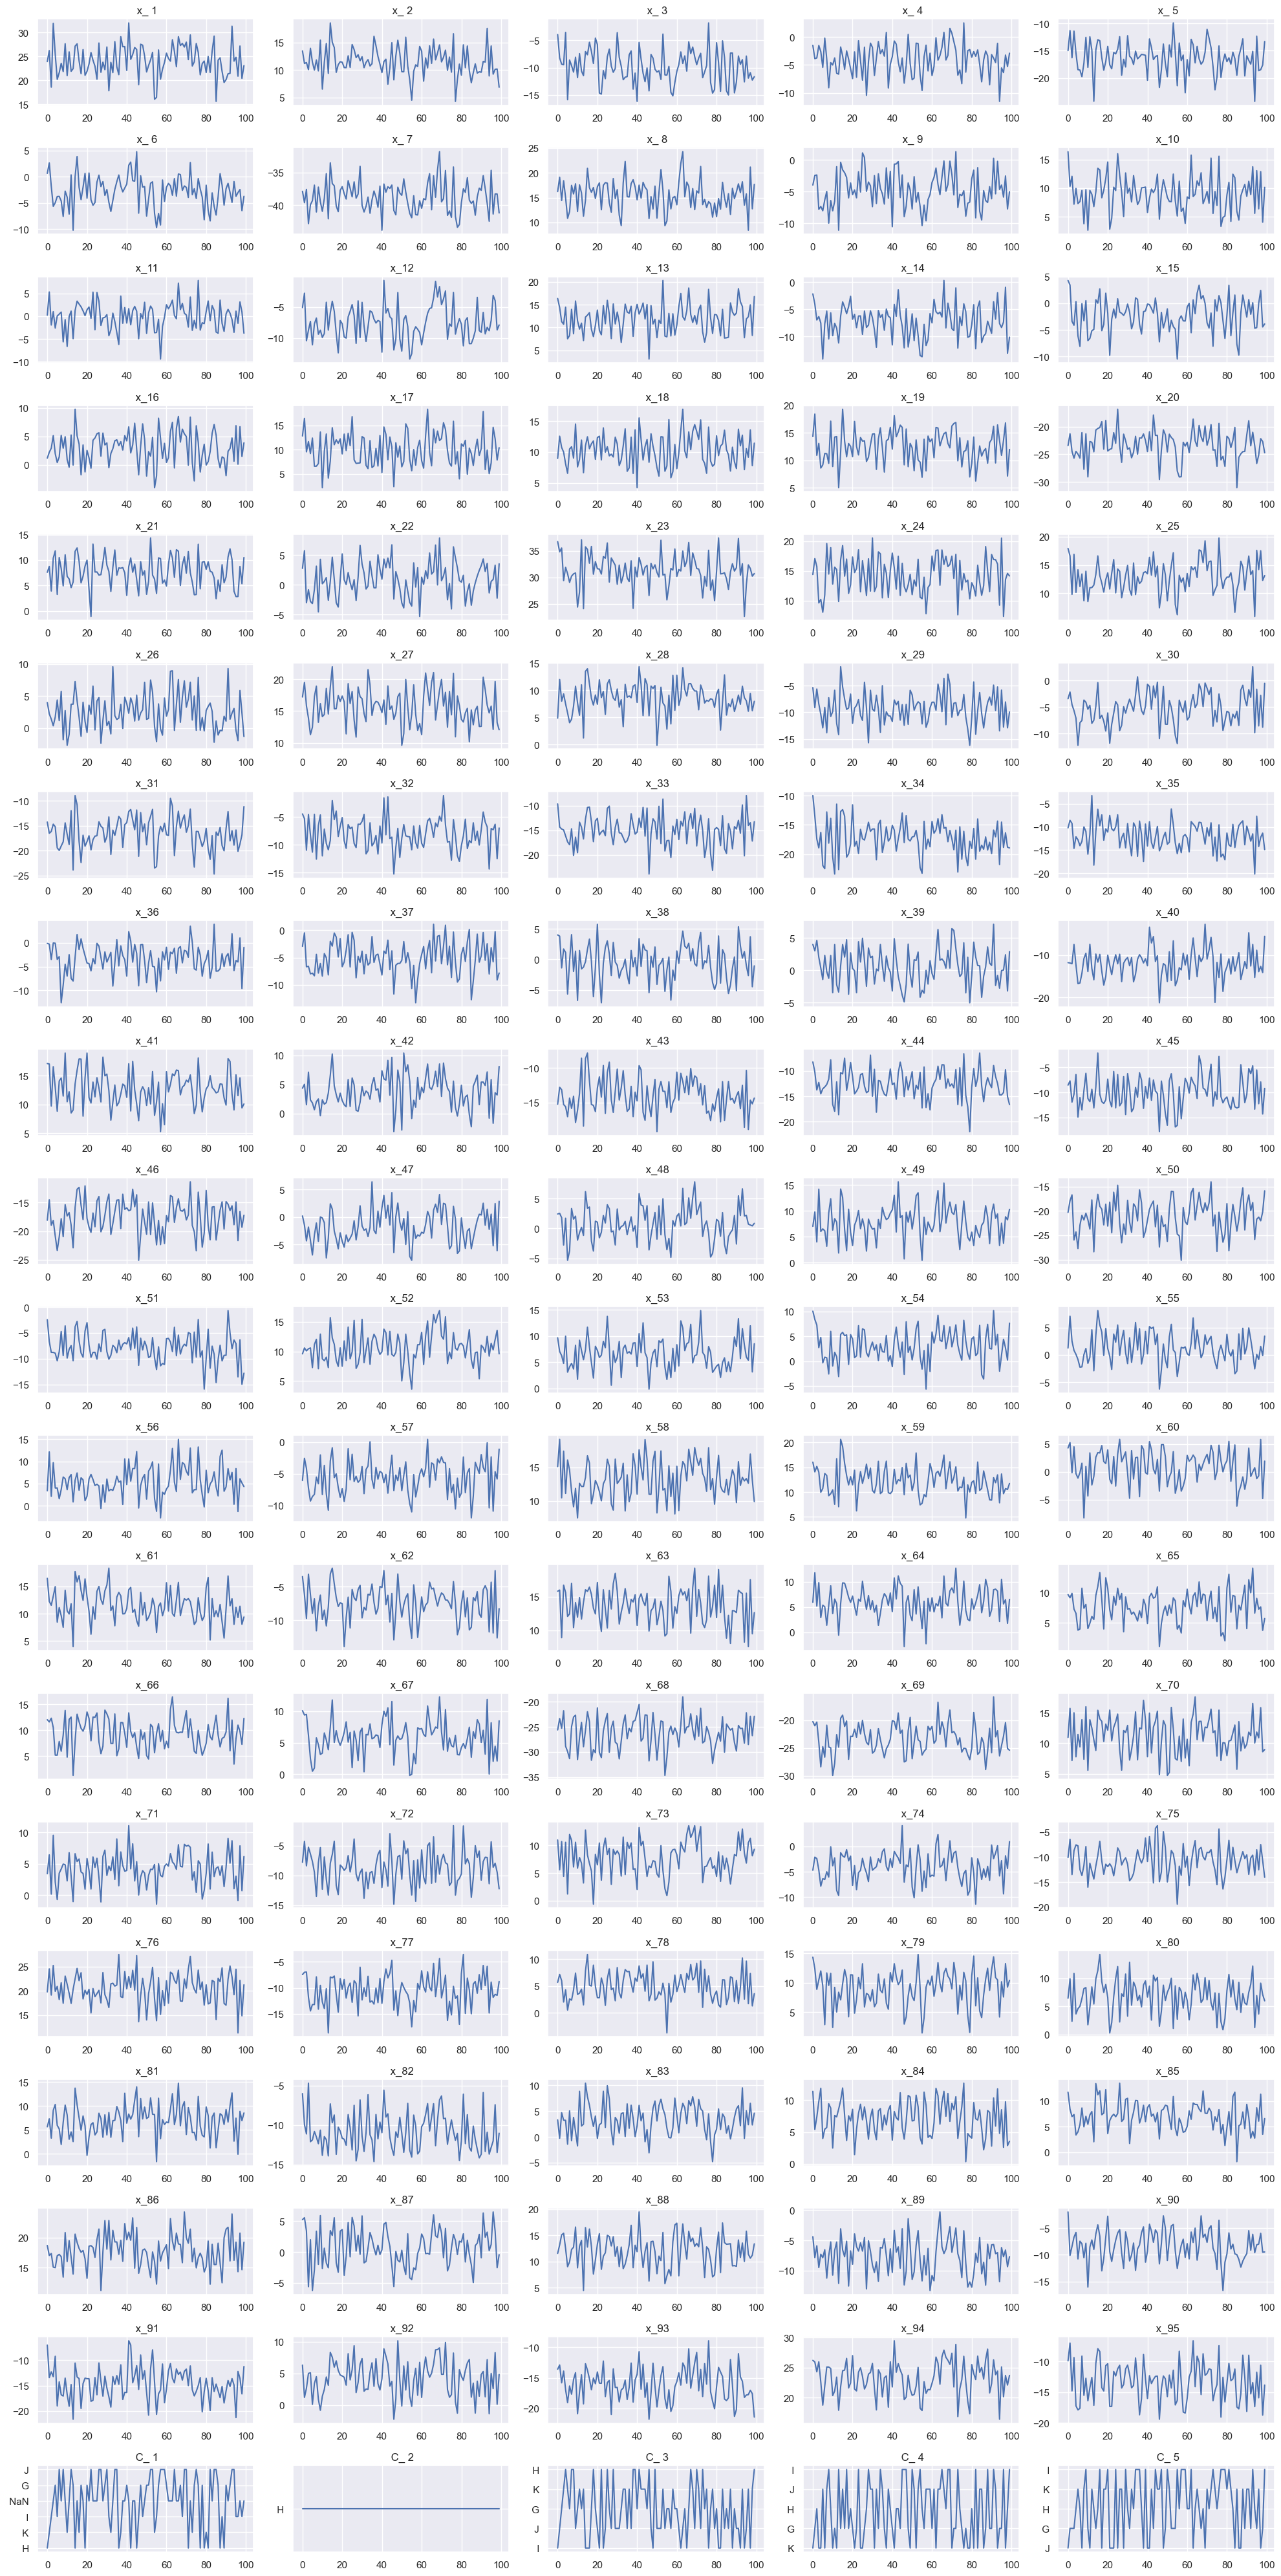

In [ ]:
# Impute missing values for numerical features with interpolation
imputer = IterativeImputer(max_iter=10, random_state=0)
data_imputed = data.copy()
data_imputed[numerical_features] = imputer.fit_transform(data[numerical_features])

# plot the data after imputation
plt.figure(figsize=(20, 40))
for i, feature in enumerate(features):
    plt.subplot(20, 5, i+1)
    plt.title(feature)
    plt.plot(data_imputed[feature])
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.savefig('Plots/train_development_iterative_imputation.png')
plt.show()

We see a lot of missing values. Let's try to remove rows that have more than 15 missing values:

#### Exploration of target variable

/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


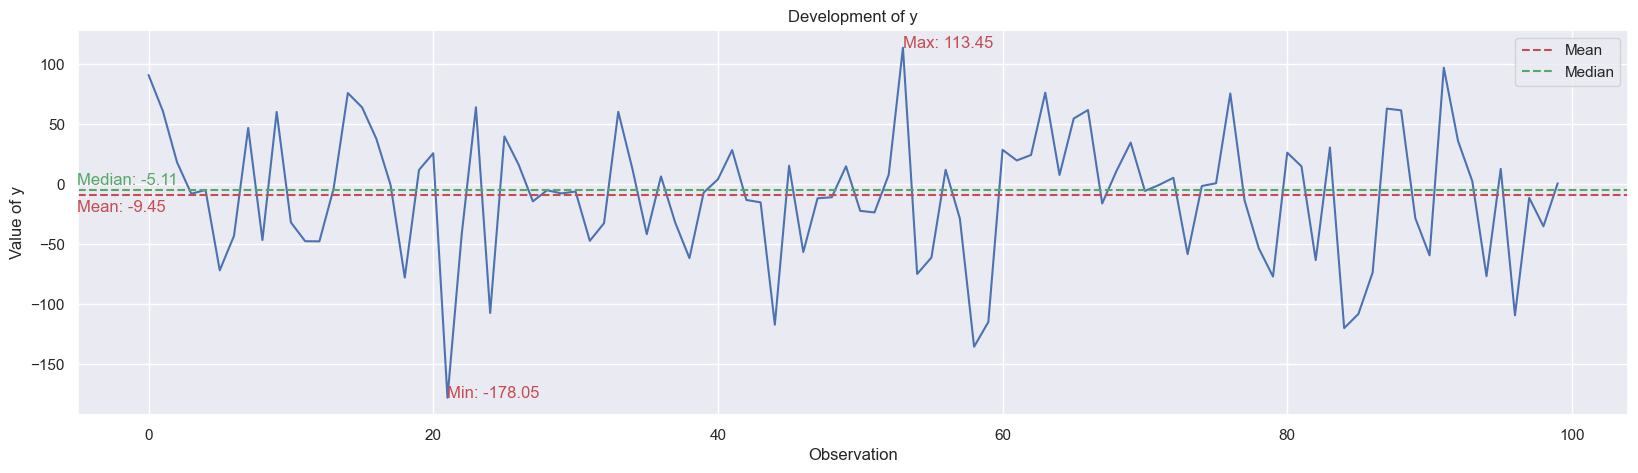

In [10]:
# Development of y over time
plt.figure(figsize=(20, 5))
plt.title("Development of y")
plt.xlabel("Observation")
plt.ylabel("Value of y")
sns.lineplot(x=data.index, y=data.y)
# min and max
plt.text(data.y.idxmax(), data.y.max(), f'Max: {round(data.y.max(),2)}', c = 'r')
plt.text(data.y.idxmin(), data.y.min(), f'Min: {round(data.y.min(),2)}', c = 'r')
# mean and median
plt.axhline(data.y.mean(), color='r', linestyle='--', label='Mean')
plt.text(-5, data.y.mean()-14, f'Mean: {round(data.y.mean(),2)}', c = 'r')
plt.axhline(data.y.median(), color='g', linestyle='--', label='Median')
plt.text(-5, data.y.median()+4, f'Median: {round(data.y.median(),2)}', c = 'g')
plt.legend()
plt.savefig('Plots/train_y_development.png')
plt.show()

#### Feature selection
* How to handle numerical vs categorical features? 1-hot encode categorical features perhaps?
* Which techniques to use?
* Regularization, Ridge Regression, Shrink parameters. How to chose optimal Lambda value? 
* Ragularization, Lasso Regression, Remove parameters. How to chose optimal Lambda value? 
* **Elastic net, mix of the 2 above.** How to chose optimal lambda and alpha values?
* Forward vs Backward Selection
* Clustering of features
* PCA
* Feature assessment, Bonferroni Correction, FDR, Benjamini Hochbergs.

AttributeError: 'numpy.float64' object has no attribute 'startswith'

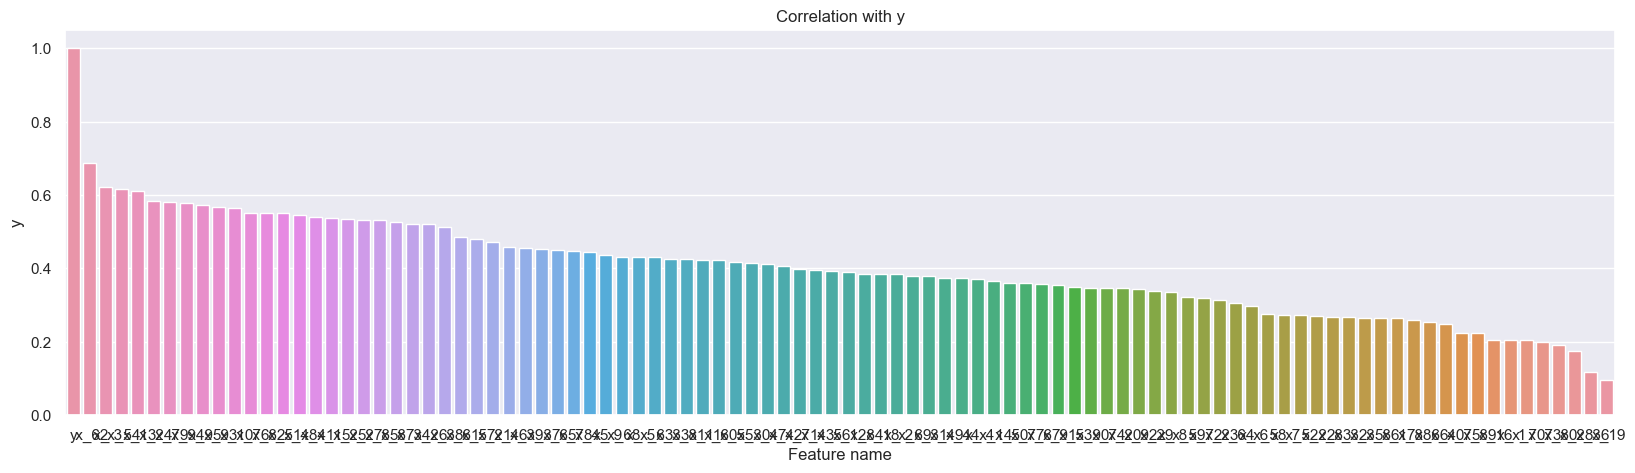

In [109]:
# correlation analysis
data_num = data.select_dtypes(include=['float64'])
corr = data_num.corr()
# sort corr by y
corr = corr.sort_values(by='y', ascending=False)
# barplot of correlation with y
plt.figure(figsize=(20, 5))
plt.title("Correlation with y")
plt.xlabel("Feature name")
plt.ylabel("Correlation with y")
sns.barplot(x=corr.index, y=corr.y, hue=corr.y, dodge=False)
plt.legend(loc='upper right', title='Correlation with y')
plt.xticks(rotation=90)
plt.savefig('Plots/train_correlation_y.png')
plt.show()

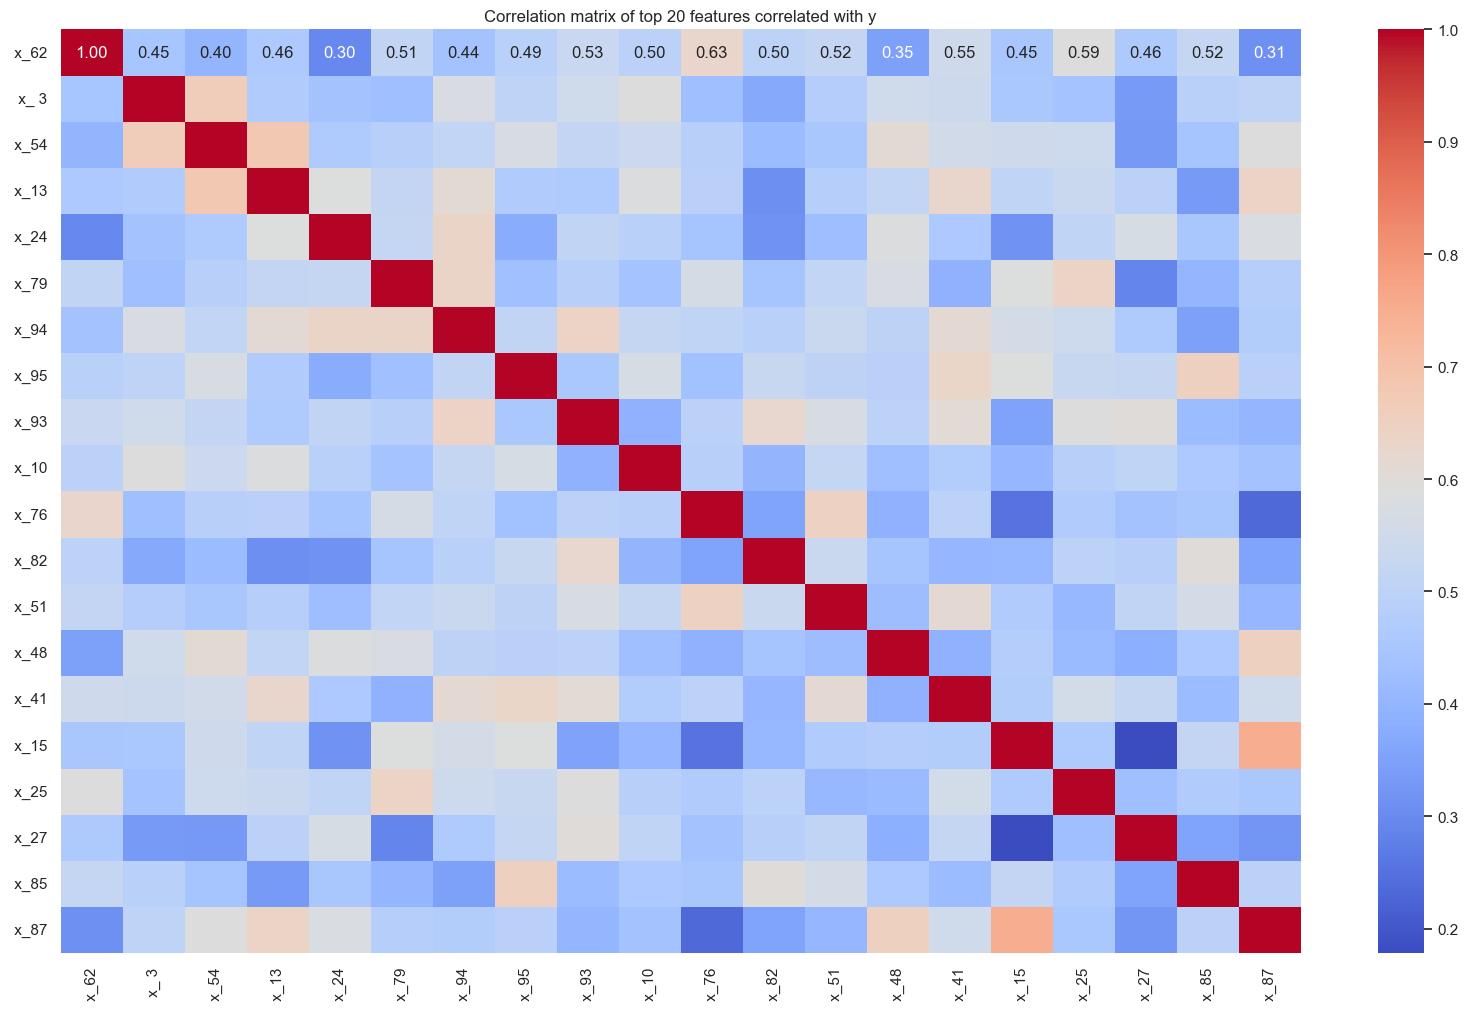

In [13]:
# filter top 20 correlated features with y
top20_corr = corr.y[1:21]
# plot the correlation matrix between these features
plt.figure(figsize=(20, 12))
plt.title("Correlation matrix of top 20 features correlated with y")
sns.heatmap(data_num[top20_corr.index].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig('Plots/train_correlation_matrix_top20.png')
plt.show()

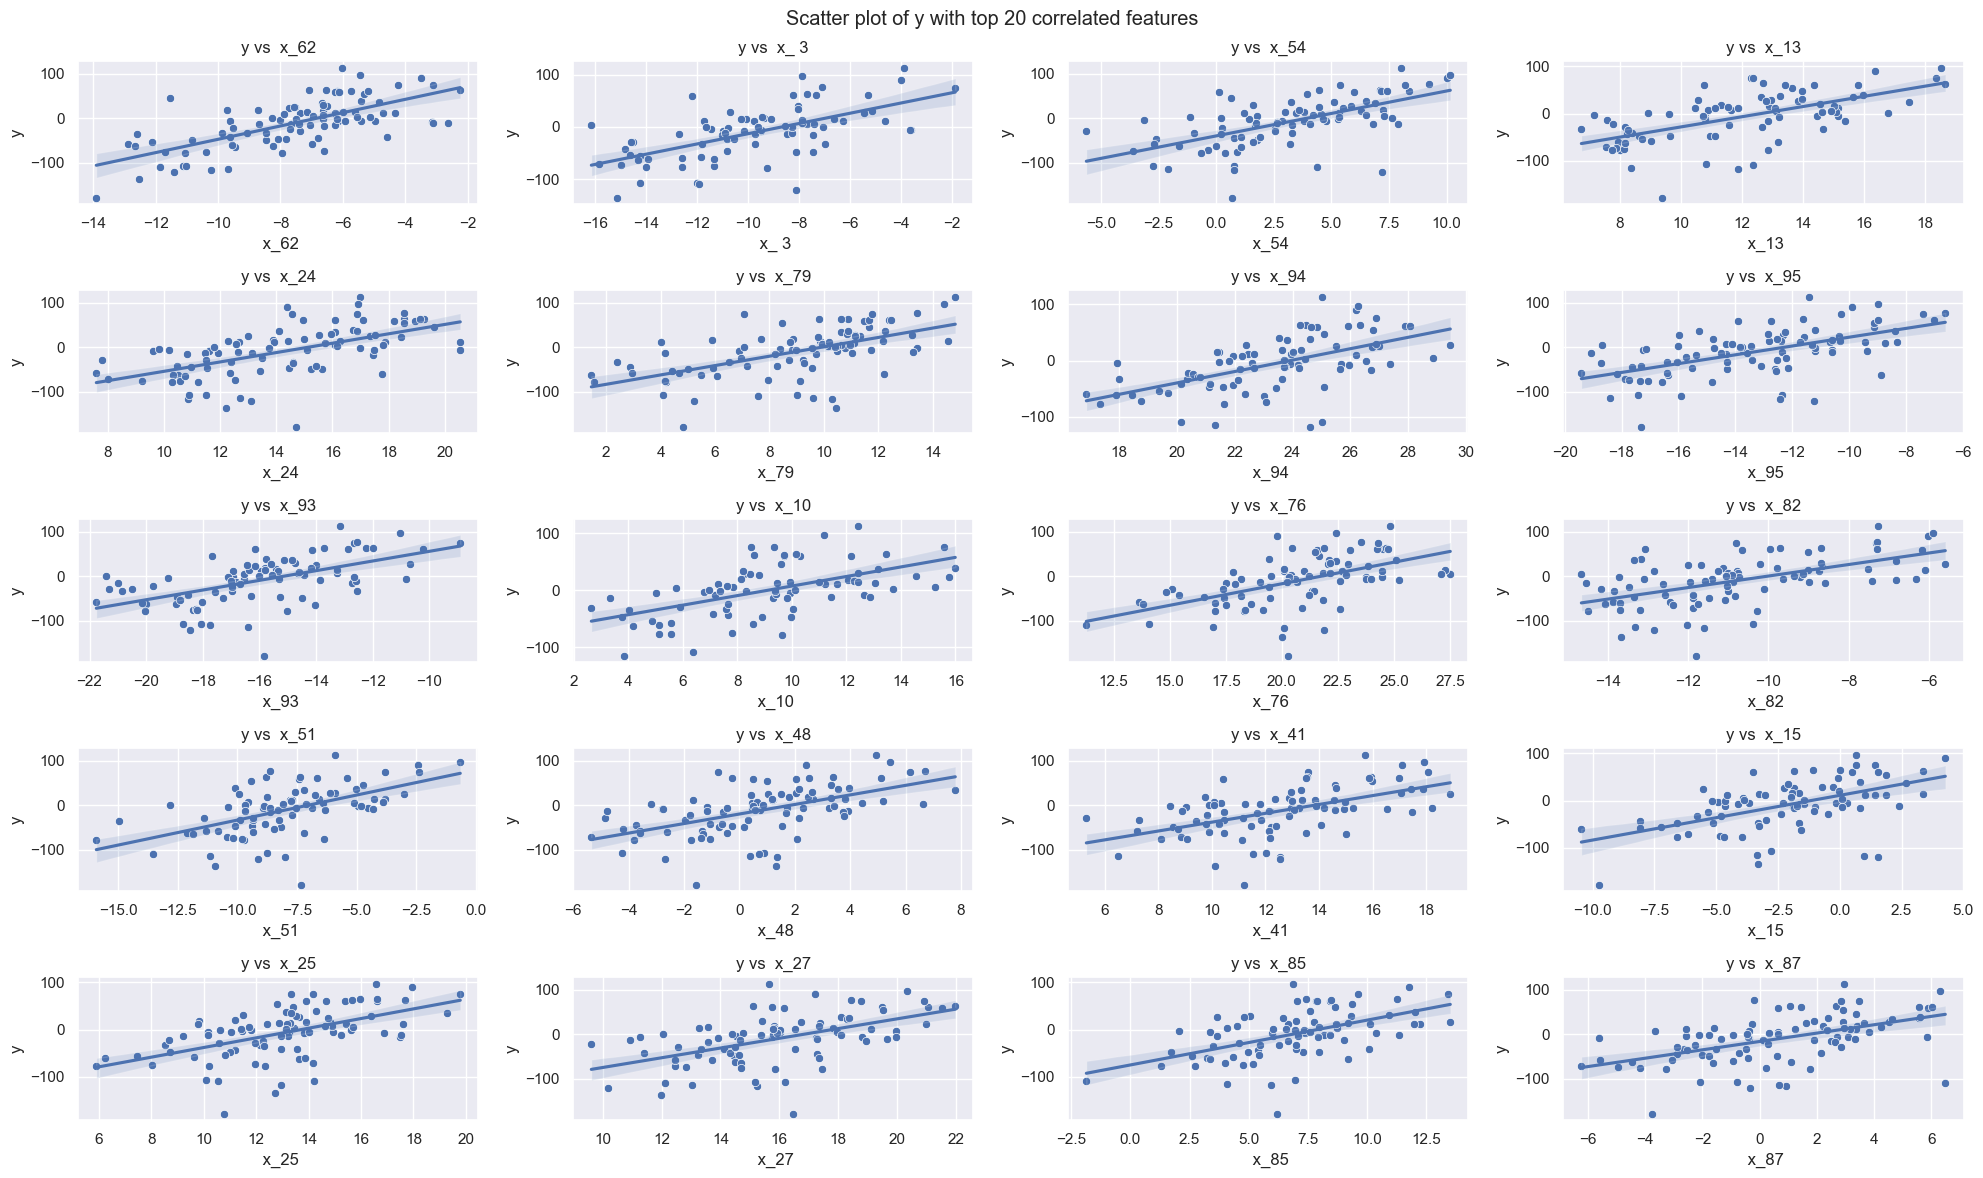

In [14]:
# scatter plot of y with top 20 correlated features in 5x4 subplot
plt.figure(figsize=(20, 12))
plt.suptitle("Scatter plot of y with top 20 correlated features")
for i, col in enumerate(top20_corr.index):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(x=data[col], y=data.y)
    plt.title(f"y vs {col}")
    # fit line
    sns.regplot(x=data[col], y=data.y, scatter=False)
plt.tight_layout()
plt.savefig('Plots/train_scatter_with_y_top20.png')
plt.show()

In [15]:
data_num = data.select_dtypes(include=['float64'])
corr = data_num.corr()

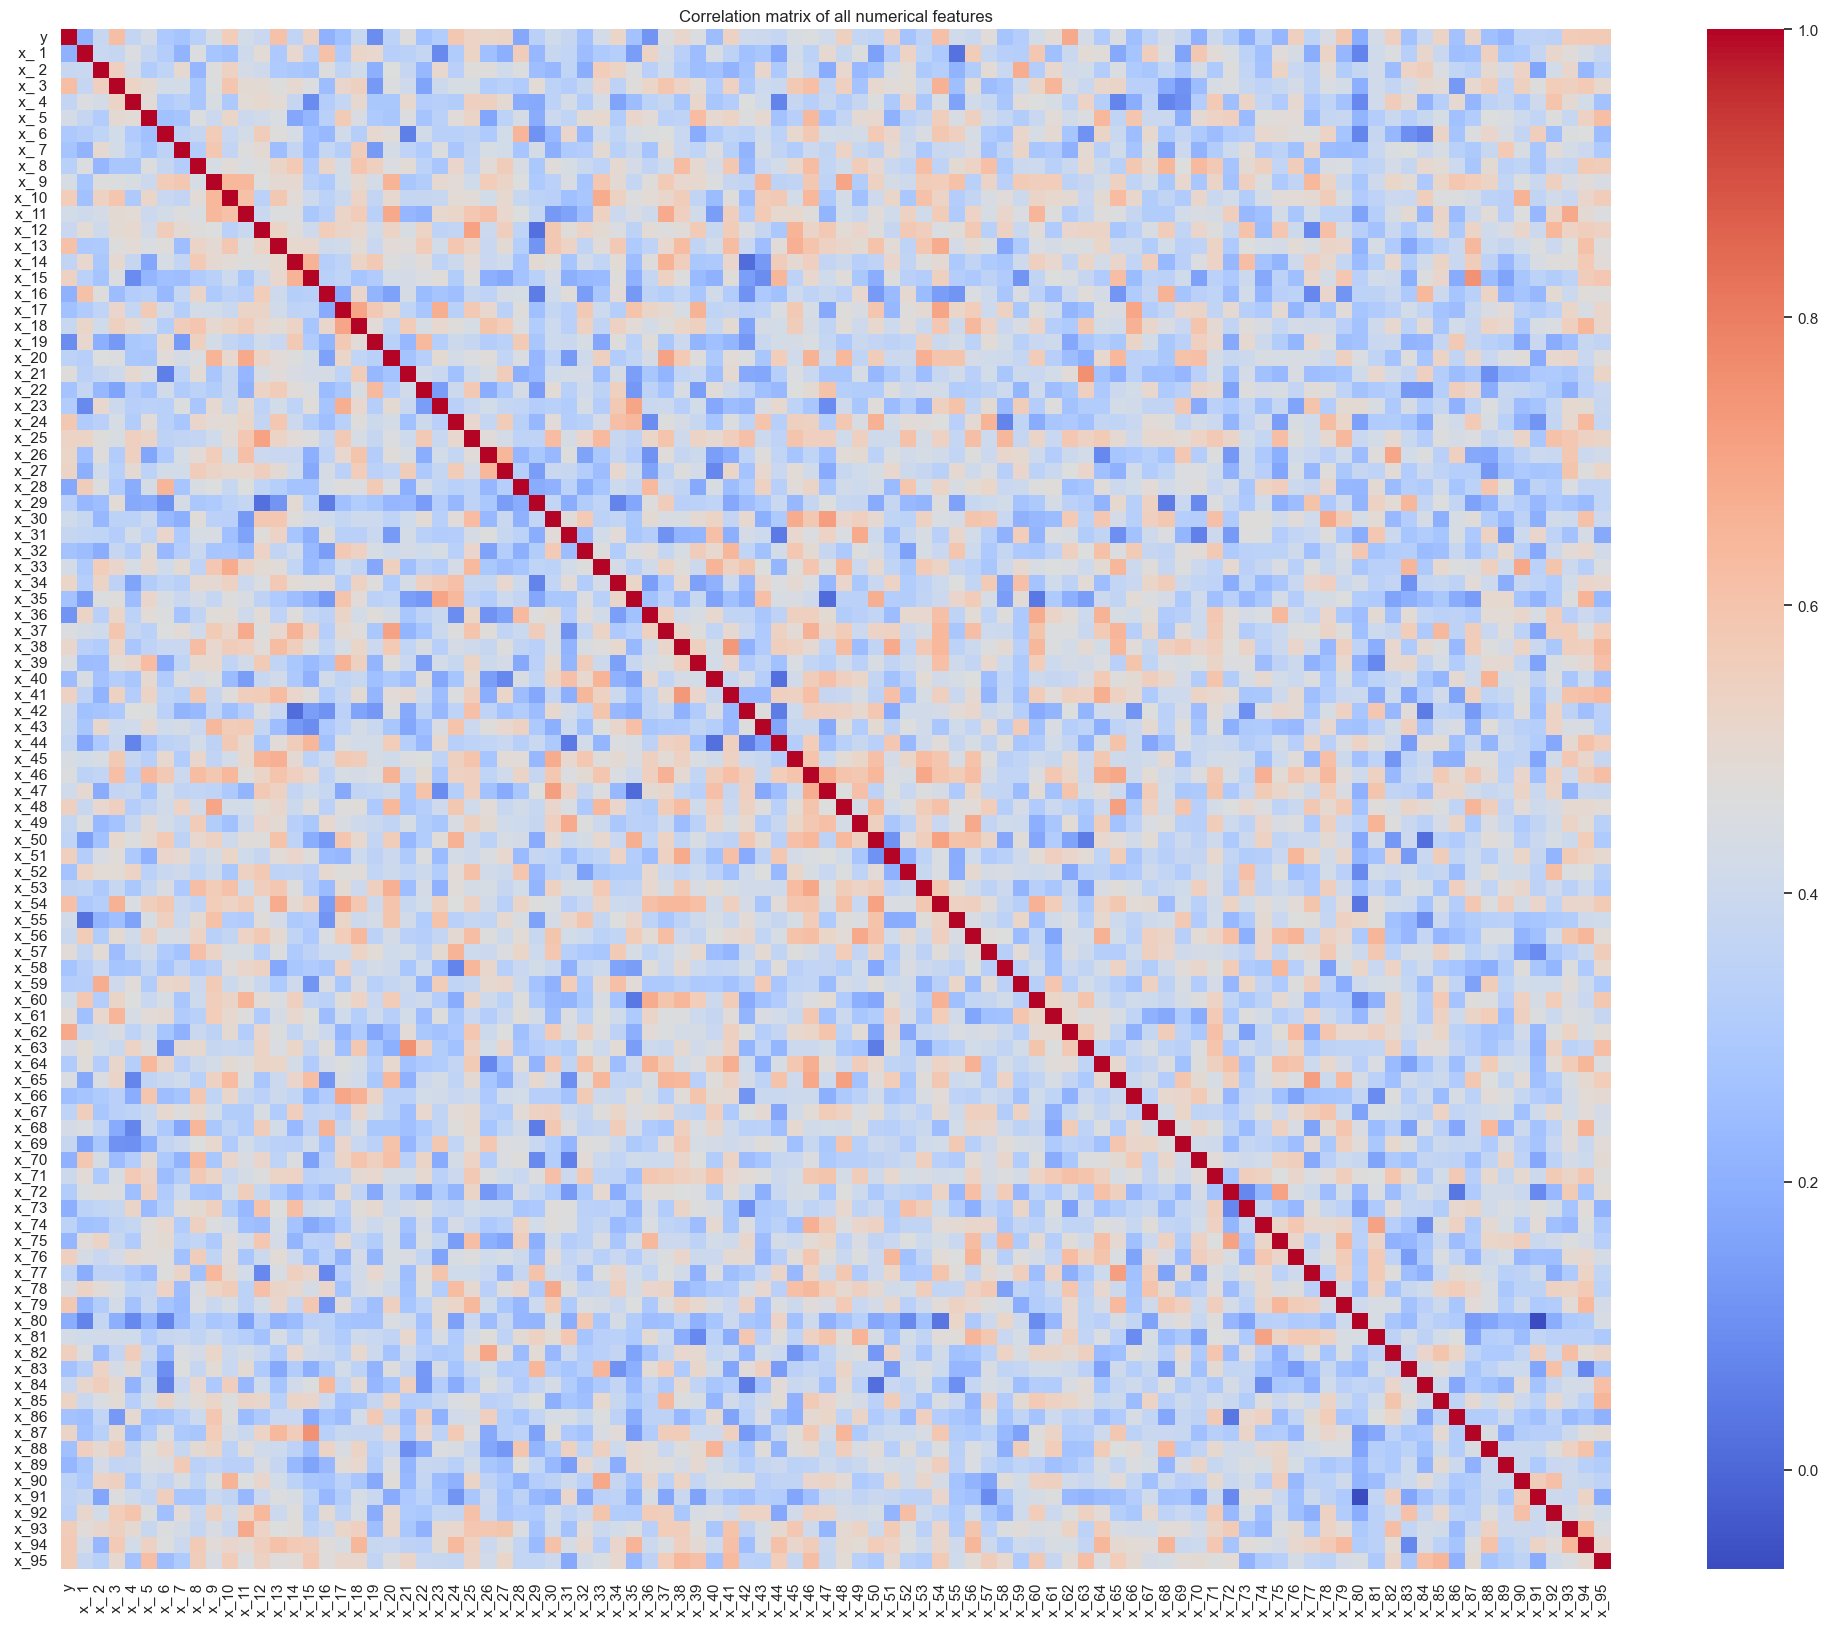

In [330]:
plt.figure(figsize=(25, 20))
plt.title("Correlation matrix of all numerical features")
sns.heatmap(data_num.corr(), annot=False, fmt=".2f", cmap='coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig('Plots/train_correlation_matrix_top20.png')
plt.show()

/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pa

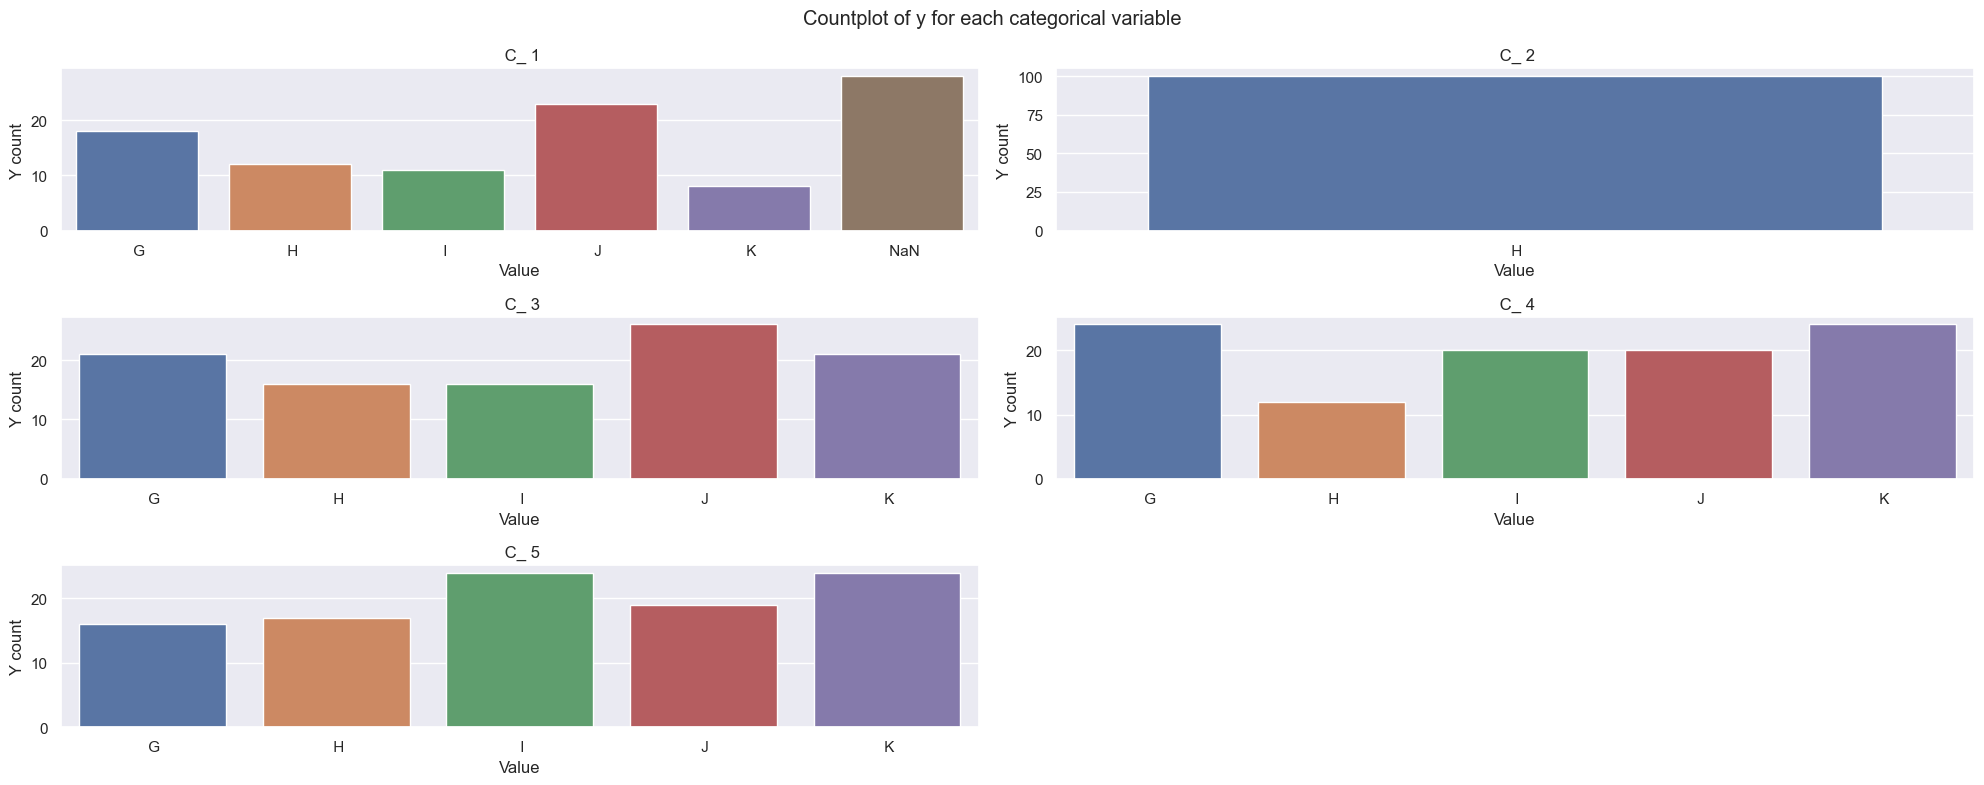

In [16]:
data_cat = data.select_dtypes(include=['category'])
# subplot for each categorical variable, countplot of y
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 8))
fig.suptitle("Countplot of y for each categorical variable")
for i, ax in enumerate(axes.flatten()):
    if i < data_cat.shape[1]:
        sns.countplot(x=data_cat.iloc[:, i], ax=ax)
        ax.set_title(data_cat.columns[i])
        ax.set_xlabel("Value")
        ax.set_ylabel("Y count")
    else:
        fig.delaxes(ax)
plt.tight_layout()
plt.show()

# Train model

* Binary / onehot encoding of categorical features
* Train and validation on imputed data
* Cross Validation
* Standardize in each cv fold
* Train Elastic Net model
* RMSE, Accuracy, R^2
* Global Interpretability. Beta values with t-statistic for linear regression. DecisionTree Sklearn FeatureImportances

### First version
* Iterative Imputer for missing values
* Binary Encoder for categorical features
* All features
* Elastic Net
* Results:
* MSE: 243.33564098079373
* R2: 0.914663679874118
* MAE: 12.753609579215079
* RMSE: 15.599219242667042

In [299]:
# Data preperation (one-hot encoding)
df_onehot = pd.DataFrame(data)

# Identify categorical variables
categorical_columns = [' C_ 1', ' C_ 2', ' C_ 3', ' C_ 4', ' C_ 5']  
NaN_array = np.zeros(100)

# Perform one-hot encoding for categorical variables
one_hot_encoded = pd.get_dummies(df_onehot[categorical_columns], drop_first=False, dummy_na=False, dtype=int)
one_hot_encoded.insert(7, " C_ 2_ NaN", NaN_array, True)
one_hot_encoded.insert(13, " C_ 3_ NaN", NaN_array, True)
one_hot_encoded.insert(19, " C_ 4_ NaN", NaN_array, True)
one_hot_encoded.insert(25, " C_ 5_ NaN", NaN_array, True)

# Drop the original categorical columns from the DataFrame
df_onehot = df_onehot.drop(columns=categorical_columns)

# Concatenate the one-hot encoded columns with the original DataFrame
data_encoded = pd.concat([df_onehot, one_hot_encoded], axis=1)

In [306]:
data_encoded


y       x_ 1       x_ 2       x_ 3      x_ 4       x_ 5  \
0    90.685036        NaN        NaN  -3.978178 -1.504027 -14.986790   
1    60.844445  26.204958  11.185962  -8.247602 -3.875866 -11.329702   
2    18.062345  18.560873  11.355342  -9.370161 -3.745315 -16.292421   
3    -8.139839  31.896496  10.069040  -9.484426 -1.512786 -11.421909   
4    -4.994792  25.400286        NaN  -3.600959 -2.615988 -15.455676   
..         ...        ...        ...        ...       ...        ...   
95   12.574444  24.821083  14.377228  -7.899269 -5.531786        NaN   
96 -109.414997  20.848176   9.238049 -11.921478 -6.374971 -18.648810   
97  -11.548116  27.160523  10.134287 -10.920363 -3.231409 -18.474369   
98  -35.263761  20.391153  10.180320        NaN -5.296246 -17.612480   
99    0.527999  23.061566   6.863659 -11.654218 -2.896630 -13.324229   

        x_ 6       x_ 7       x_ 8      x_ 9  ...   C_ 4_ I   C_ 4_ J  \
0   0.651581 -37.878245  16.213807 -3.965437  ...         0         0   
1   2.637900 -39.617497        NaN -2.442164  ...         0         0   
2  -1.831774 -37.584605  14.411348 -2.376175  ...         0         0   
3  -5.649180 -42.830037  18.403197 -7.791762  ...         0         0   
4  -4.950816 -39.932456        NaN -7.341165  ...         0         0   
..       ...        ...        ...       ...  ...       ...       ...   
95 -3.732251        NaN  15.752089       NaN  ...         0         0   
96 -3.019048 -41.358696   8.435083 -5.864114  ...         1         0   
97 -2.431349 -38.280634  21.150995 -2.531643  ...         0         0   
98 -6.472314 -38.292821  12.740686       NaN  ...         0         0   
99 -3.733488 -41.189621  17.670513       NaN  ...         1         0   

     C_ 4_ K   C_ 4_ NaN   C_ 5_ G   C_ 5_ H   C_ 5_ I   C_ 5_ J   C_ 5_ K  \
0          1         0.0         0         0         0         1         0   
1          0         0.0         1         0         0         0         0   
2          0         0.0         1         0         0         0         0   
3          1         0.0         1         0         0         0         0   
4          1         0.0         0         1         0         0         0   
..       ...         ...       ...       ...       ...       ...       ...   
95         0         0.0         1         0         0         0         0   
96         0         0.0         0         0         0         0         1   
97         1         0.0         0         0         0         1         0   
98         0         0.0         1         0         0         0         0   
99         0         0.0         0         0         1         0         0   

     C_ 5_ NaN  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
..         ...  
95         0.0  
96         0.0  
97         0.0  
98         0.0  
99         0.0  

[100 rows x 122 columns]

In [307]:
# Split data in training and test
X = data_encoded.drop(columns='y')
y = data_encoded.y
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [308]:
# Data preparation
imputer = IterativeImputer(max_iter=10, random_state=42)
#imputer = KNNImputer()
X_train_imputed = X_train.copy()
X_val_imputed = X_val.copy()
X_train_imputed[numerical_features] = imputer.fit_transform(X_train[numerical_features])
X_val_imputed[numerical_features] = imputer.fit_transform(X_val[numerical_features])

/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [309]:
X_imputed = pd.concat([X_train_imputed, X_val_imputed])
X_imputed=X_imputed.sort_index(axis=0)

In [166]:
# Data preparation
#imputer = IterativeImputer(max_iter=10, random_state=0)
#data_imputed = data.copy()
#data_imputed[numerical_features] = imputer.fit_transform(data[numerical_features])

# Binary encoding of categorical features
#encoder = ce.BinaryEncoder(cols=categorical_features)
#data_encoded = encoder.fit_transform(data_imputed)

In [310]:
# Split data into train and test
#X = data_encoded.drop(columns='y')
#y = data_encoded.y
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

In [311]:
# print range of X_train_scaled
print("Range of y:", y_train.min(), y_train.max())

Range of y: -178.046246 96.821336


In [312]:
# Model selection, alpha and L1 ratio for ElasticNet
alpha = np.linspace(0, 4, num=20)
l1_ratio = np.linspace(0, 1, num=20)

with warnings.catch_warnings(): # done to disable all the convergence warnings from elastic net
    warnings.simplefilter("ignore")

    # plot MSE for different alpha and l1_ratio
    mse = np.zeros((len(alpha), len(l1_ratio)))
    for i, a in enumerate(alpha):
        for j, l in enumerate(l1_ratio):
            model = ElasticNet(alpha=a, l1_ratio=l)
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_val_scaled)
            mse[i, j] = mean_squared_error(y_val, y_pred)

# print best alpha and l1_ratio
min_mse = np.min(mse)
min_mse_idx = np.where(mse == min_mse)
best_alpha = alpha[min_mse_idx[0][0]]
best_l1_ratio = l1_ratio[min_mse_idx[1][0]]
print(f"Best alpha = {best_alpha}")
print(f"Best l1_ratio (Lasso) = {best_l1_ratio}")
print(f"Minimum MSE = {min_mse}")

Best alpha = 1.263157894736842
Best l1_ratio (Lasso) = 1.0
Minimum MSE = 392.8162457642312


In [313]:
enet = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
enet.fit(X_train_scaled, y_train)
y_pred = enet.predict(X_val_scaled)
print("MSE:", mean_squared_error(y_val, y_pred))
print("R2:", r2_score(y_val, y_pred))
print("MAE:", mean_absolute_error(y_val, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred)))

MSE: 392.8162457642312
R2: 0.8622417465683566
MAE: 16.976413746510378
RMSE: 19.81959247220364


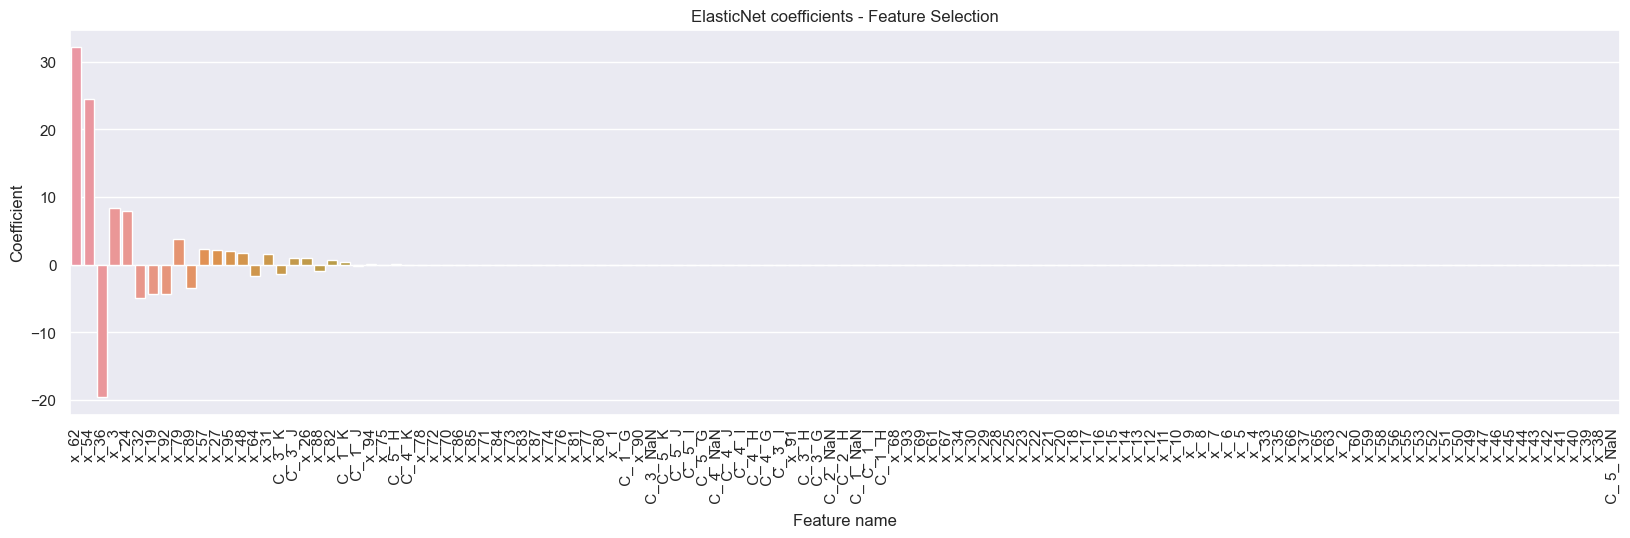

In [314]:
# Coefficients
coef = pd.DataFrame(enet.coef_, index=X.columns, columns=['Coefficient'])
# sort by absolute value
coef['abs'] = coef.Coefficient.abs()
coef = coef.sort_values(by='abs', ascending=False).drop(columns='abs')
# plot the coefficients
plt.figure(figsize=(20, 5))
plt.title("ElasticNet coefficients - Feature Selection")
plt.xlabel("Feature name")
plt.ylabel("Coefficient")
sns.barplot(x=coef.index, y=coef.Coefficient)
plt.xticks(rotation=90)
plt.show()

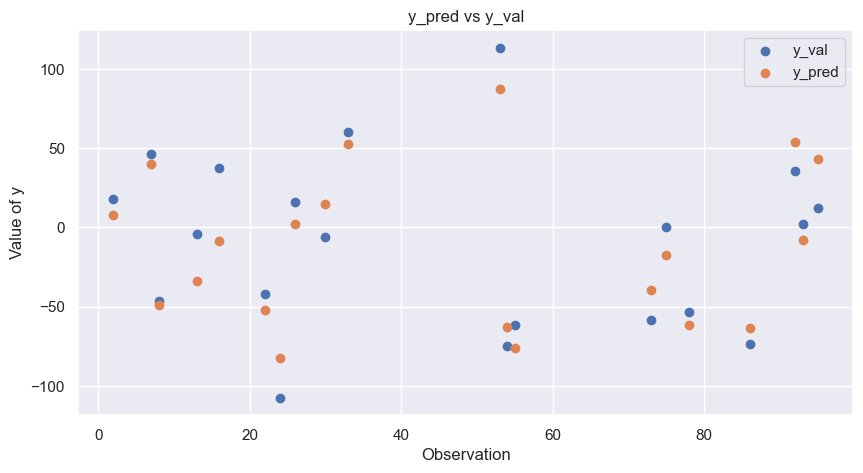

In [315]:
# Model evaluation, y_pred vs y_test
plt.figure(figsize=(10, 5))
plt.title("y_pred vs y_val")
plt.xlabel("Observation")
plt.ylabel("Value of y")
# dot
plt.scatter(y_val.index, y_val, label='y_val')
plt.scatter(y_val.index, y_pred, label='y_pred')
plt.legend()
plt.show()

### Version 2
* Add Cross Validation

In [256]:
# cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=0)
mse = np.zeros(10)
r2 = np.zeros(10)
mae = np.zeros(10)
rmse = np.zeros(10)
i = 0
for train_index, test_index in kf.split(X_imputed):
    X_train, X_val = X_imputed.iloc[train_index], X_imputed.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    enet = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
    enet.fit(X_train_scaled, y_train)
    y_pred = enet.predict(X_val_scaled)
    mse[i] = mean_squared_error(y_val, y_pred)
    r2[i] = r2_score(y_val, y_pred)
    mae[i] = mean_absolute_error(y_val, y_pred)
    rmse[i] = np.sqrt(mean_squared_error(y_val, y_pred))
    i += 1
print("MSE:", mse.mean())
print("R2:", r2.mean())
print("MAE:", mae.mean())
print("RMSE:", rmse.mean())

MSE: 363.60940647138557
R2: 0.8496866872615236
MAE: 14.898786543147517
RMSE: 18.54861404817923


In [333]:
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_val_scaled)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("MSE:", mse.mean())
print("R2:", r2.mean())
print("MAE:", mae.mean())
print("RMSE:", rmse.mean())

MSE: 2359.3590409684507
R2: 0.17258722314389963
MAE: 38.22303377950001
RMSE: 48.573233791548724


### Version 3
* Lasso regression
* Results: Same as Elastic Net

In [257]:
# Lasso regression, chose lambda
alpha_lasso = np.linspace(0.1, 1, num=20)
mse = np.zeros(len(alpha_lasso))
for i, l in enumerate(alpha_lasso):
    model = linear_model.Lasso(alpha=l)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    mse[i] = mean_squared_error(y_val, y_pred)

# print best alpha
min_mse = np.min(mse)
min_mse_idx = np.where(mse == min_mse)
best_alpha = alpha_lasso[min_mse_idx[0][0]]
print(f"Best alpha = {best_alpha}")
print(f"Minimum MSE = {min_mse}")

Best alpha = 0.19473684210526315
Minimum MSE = 467.77553590295963


/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.727e+02, tolerance: 2.330e+01
  model = cd_fast.enet_coordinate_descent(


In [258]:
# Without cross validation
lasso = linear_model.Lasso(alpha=best_alpha)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_val_scaled)
print("MSE:", mean_squared_error(y_val, y_pred))
print("R2:", r2_score(y_val, y_pred))
print("MAE:", mean_absolute_error(y_val, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred)))

MSE: 467.77553590295963
R2: 0.9211110359302005
MAE: 16.419206214615503
RMSE: 21.62811910229273


In [218]:
# with cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)
mse = np.zeros(5)
r2 = np.zeros(5)
mae = np.zeros(5)
rmse = np.zeros(5)
i = 0
for train_index, test_index in kf.split(X_imputed):
    X_train, X_val = X_imputed.iloc[train_index], X_imputed.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    lasso = linear_model.Lasso(alpha=best_alpha)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_val_scaled)
    mse[i] = mean_squared_error(y_val, y_pred)
    r2[i] = r2_score(y_val, y_pred)
    mae[i] = mean_absolute_error(y_val, y_pred)
    rmse[i] = np.sqrt(mean_squared_error(y_val, y_pred))
    i += 1
print("MSE:", mse.mean())
print("R2:", r2.mean())
print("MAE:", mae.mean())
print("RMSE:", rmse.mean())

MSE: 528.625547036985
R2: 0.8042939693525664
MAE: 18.11216033795506
RMSE: 22.799544090498692


### Version 4
* One hot encoding
* Sligtly worse than binary

In [220]:
# one hot encoding
encoder = ce.OneHotEncoder(cols=categorical_features)
data_encoded = encoder.fit_transform(data_imputed)

X = data_encoded.drop(columns='y')
y = data_encoded.y

kf = KFold(n_splits=10, shuffle=True, random_state=0)
mse = np.zeros(10)
r2 = np.zeros(10)
mae = np.zeros(10)
rmse = np.zeros(10)
i = 0
for train_index, test_index in kf.split(X_imputed):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    lasso = linear_model.Lasso(alpha=best_alpha)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_val_scaled)
    mse[i] = mean_squared_error(y_val, y_pred)
    r2[i] = r2_score(y_val, y_pred)
    mae[i] = mean_absolute_error(y_val, y_pred)
    rmse[i] = np.sqrt(mean_squared_error(y_val, y_pred))
    i += 1
print("MSE:", mse.mean())
print("R2:", r2.mean())
print("MAE:", mae.mean())
print("RMSE:", rmse.mean())

ValueError: X does not contain the columns listed in cols

### Version 5
* Lasso feature selection
* Linear model
* Binary encoding

In [221]:
# Lasso regression, non linear polynomial model
from sklearn.preprocessing import PolynomialFeatures

# lasso regression for feature selection
lasso = linear_model.Lasso(alpha=best_alpha)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_val_scaled)

# drop features with zero coefficient
X_train_lasso = X_train_scaled[:, lasso.coef_ != 0]
X_val_lasso = X_val_scaled[:, lasso.coef_ != 0]

# linear model
model = linear_model.LinearRegression()
model.fit(X_train_lasso, y_train)
y_pred = model.predict(X_val_lasso)
print("MSE:", mean_squared_error(y_val, y_pred))
print("R2:", r2_score(y_val, y_pred))
print("MAE:", mean_absolute_error(y_val, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred)))

MSE: 1111.3884578911989
R2: 0.7599914565552993
MAE: 25.553253842109044
RMSE: 33.337493275457874


## Test data, X New

In [316]:
print("Shape", x_new.shape)
# convert datatypes
x_new = x_new.apply(lambda x: x.astype('float64') if 'x' in x.name else x)
x_new = x_new.apply(lambda x: x.astype('category') if 'C' in x.name else x)
x_new.head()

Shape (1000, 100)


x_ 1       x_ 2       x_ 3       x_ 4       x_ 5      x_ 6       x_ 7  \
0  25.971128  10.429886 -10.660376  -3.582531        NaN       NaN -36.779939   
1  25.758732  11.887546  -9.844684  -1.581865 -16.918897 -4.046057 -45.243955   
2  23.782500   7.347982        NaN  -5.679517 -17.396745 -6.266300        NaN   
3  19.074196        NaN -11.174759 -10.383339 -18.526151 -4.435927 -42.421554   
4  23.730968        NaN -10.863462  -0.875571 -16.279798 -2.969740 -34.913373   

        x_ 8      x_ 9      x_10  ...       x_91      x_92       x_93  \
0        NaN -7.351115       NaN  ... -11.795808  2.555591        NaN   
1  13.571447 -9.491872  9.277601  ... -13.024096  3.842341 -16.125888   
2        NaN -4.723122  5.481726  ... -16.494321       NaN -17.896117   
3  14.394625 -7.643014  9.247063  ... -15.797810  1.072284 -22.433262   
4   8.506439 -1.781169       NaN  ... -14.149051  3.292523 -12.151728   

        x_94       x_95   C_ 1   C_ 2   C_ 3   C_ 4   C_ 5  
0  23.179880 -15.602604      G      H      G      J    NaN  
1  20.753334 -12.107064      I      H    NaN    NaN      H  
2  22.476679 -11.235097    NaN      H    NaN      H      K  
3  22.744498 -14.742469      G      H      K      K      J  
4  22.667303        NaN      H      H      J      H      G  

[5 rows x 100 columns]

In [317]:
features = [x for x in x_new.columns if x != 'y']   
numerical_features_new = x_new[features].select_dtypes(include=['float64']).columns
categorical_features_new = x_new[features].select_dtypes(include=['category']).columns

Number of features with missing values 95


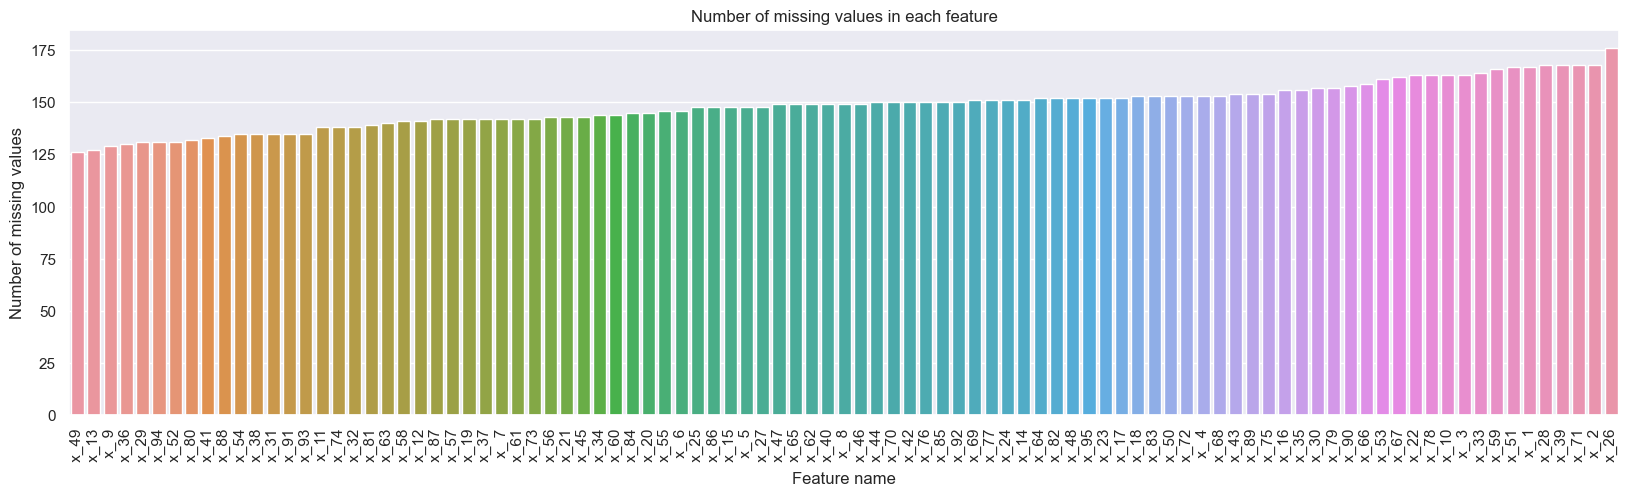

In [318]:
# Count plot of variables with missing values
missing = x_new.isnull().sum()
missing = missing[missing > 0]
print("Number of features with missing values", missing.shape[0])
missing.sort_values(inplace=True)
plt.figure(figsize=(20, 5))
plt.title("Number of missing values in each feature")
plt.xlabel("Feature name")
plt.ylabel("Number of missing values")
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=90)
plt.show()

/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pa

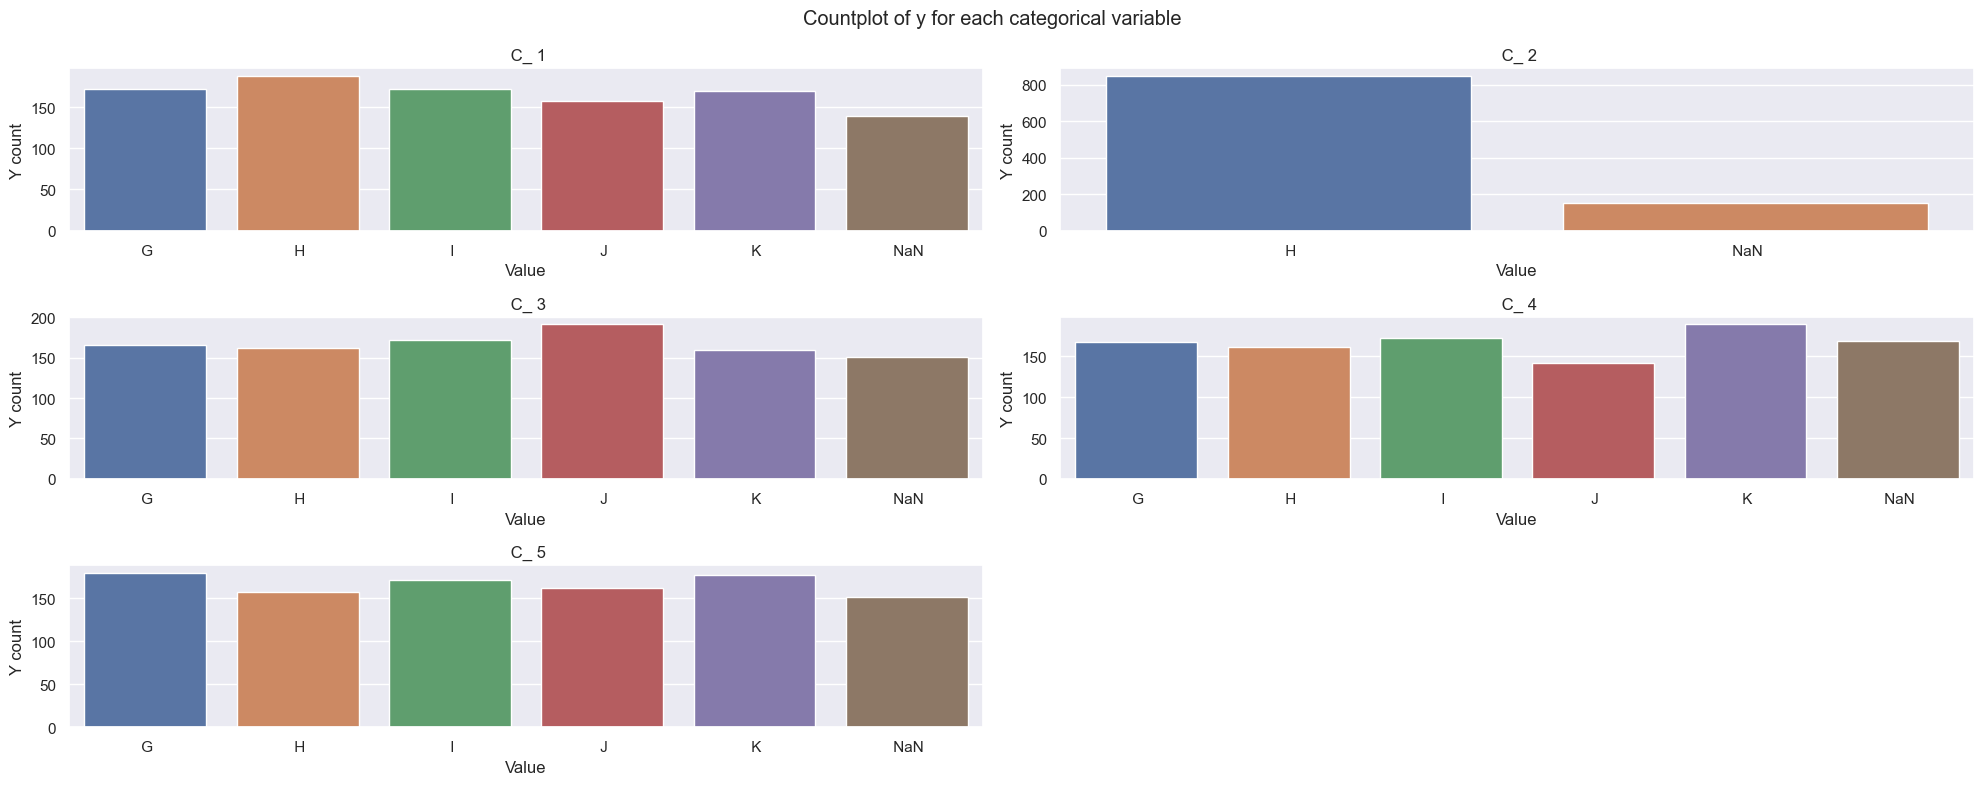

In [319]:
data_cat_new = x_new.select_dtypes(include=['category'])
# subplot for each categorical variable, countplot of y
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 8))
fig.suptitle("Countplot of y for each categorical variable")
for i, ax in enumerate(axes.flatten()):
    if i < data_cat_new.shape[1]:
        sns.countplot(x=data_cat_new.iloc[:, i], ax=ax)
        ax.set_title(data_cat_new.columns[i])
        ax.set_xlabel("Value")
        ax.set_ylabel("Y count")
    else:
        fig.delaxes(ax)
plt.tight_layout()
plt.show()

### Data prep

In [320]:
# Data preperation (one-hot encoding)
df_new_onehot = pd.DataFrame(x_new)

# Identify categorical variables
categorical_columns = [' C_ 1', ' C_ 2', ' C_ 3', ' C_ 4', ' C_ 5']  

# Perform one-hot encoding for categorical variables
one_hot_new_encoded = pd.get_dummies(df_new_onehot[categorical_columns], drop_first=False, dummy_na=False, dtype=int)

# Drop the original categorical columns from the DataFrame
df_new_onehot = df_new_onehot.drop(columns=categorical_columns)

# Concatenate the one-hot encoded columns with the original DataFrame
data_new_encoded = pd.concat([df_new_onehot, one_hot_new_encoded], axis=1)

In [326]:
# Data preparation
imputer = IterativeImputer(max_iter=10, random_state=0)
#imputer = KNNImputer()
data_imputed = data_new_encoded.copy()
data_imputed[numerical_features_new] = imputer.fit_transform(data_new_encoded[numerical_features_new])

In [327]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

In [328]:
y_new_pred = enet.predict(data_scaled)

# Predictions
* Cross Validation, how to chose optimal K?
* Center and standardize within each fold
* Regression with Elastic Net
* Estimate prediction error RMSE